<a href="https://colab.research.google.com/github/zecenbajra55/1100python/blob/main/web_scraping_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scraping the population fo nepal from the given url and saving it in a .csv file

In [ ]:
url='https://www.worldometers.info/world-population/nepal-population/'

In [ ]:
import requests
content = requests.get(url).content

In [ ]:
from bs4 import BeautifulSoup
soup= BeautifulSoup(content,'lxml')

In [ ]:
tbody = soup.find('tbody')

In [ ]:
row = tbody.find_all('tr')

In [ ]:
row[0]

<tr> <td>2023</td> <td><strong>30,896,590</strong></td> <td>1.14 %</td> <td>349,010</td> <td>-62,012</td> <td>24.4</td> <td>1.99</td> <td>216</td> <td>22.1 %</td> <td>6,835,484</td> <td>0.38 %</td> <td>8,045,311,447</td> <td>49</td> </tr>

In [ ]:
for tr in row:
    td = tr.find_all('td')
    for cell in td:
        print(cell.text.strip())

2023
30,896,590
1.14 %
349,010
-62,012
24.4
1.99
216
22.1 %
6,835,484
0.38 %
8,045,311,447
49
2022
30,547,580
1.71 %
512,591
-62,012
24.0
2.01
213
21.7 %
6,627,181
0.38 %
7,975,105,156
49
2020
29,348,627
1.79 %
516,131
306,664
23.2
2.06
205
21.2 %
6,226,233
0.37 %
7,840,952,880
49
2015
27,610,325
0.33 %
89,752
-221,059
21.5
2.25
193
19.3 %
5,317,799
0.37 %
7,426,597,537
49
2010
27,161,567
0.66 %
175,291
-293,613
20.2
2.51
189
16.7 %
4,531,339
0.39 %
6,985,603,105
46
2005
26,285,110
1.37 %
345,122
-238,799
19.1
3.14
183
14.8 %
3,884,136
0.40 %
6,558,176,119
43
2000
24,559,500
1.94 %
450,786
-147,403
18.4
3.94
171
13.0 %
3,180,501
0.40 %
6,148,898,975
41
1995
22,305,571
2.60 %
537,808
-86,300
18.2
4.79
156
10.4 %
2,328,505
0.39 %
5,743,219,454
42
1990
19,616,530
2.26 %
415,192
-650
18.1
5.21
137
8.5 %
1,660,139
0.37 %
5,316,175,862
44
1985
17,540,571
2.37 %
388,026
-30,173
18.3
5.47
122
7.0 %
1,235,180
0.36 %
4,861,730,613
43
1980
15,600,442
2.30 %
334,980
5,084
18.4
5.64
109
5.8 %
907,6

In [ ]:
all_data=[]
for tr in row:
    year=[]
    td= tr.find_all('td')
    for cell in td:
        year.append(cell.text.strip())
    all_data.append(year)

In [ ]:
all_data[0]

['2023',
 '30,896,590',
 '1.14 %',
 '349,010',
 '-62,012',
 '24.4',
 '1.99',
 '216',
 '22.1 %',
 '6,835,484',
 '0.38 %',
 '8,045,311,447',
 '49']

In [ ]:
columns=[item.text.strip() for item in soup.find('thead').find_all('th')]

In [ ]:
columns

['Year',
 'Population',
 'Yearly %  Change',
 'Yearly Change',
 'Migrants (net)',
 'Median Age',
 'Fertility Rate',
 'Density (P/Km²)',
 'Urban Pop %',
 'Urban Population',
 "Country's Share of World Pop",
 'World Population',
 'NepalGlobal Rank']

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(all_data, columns = columns)

In [ ]:
df.to_csv('population.csv',index=False)

# Reading the .csv file created and creating respective graphs

In [ ]:
df= pd.read_csv('/content/population.csv')

In [ ]:
df.shape

(16, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          16 non-null     int64  
 1   Population                    16 non-null     object 
 2   Yearly %  Change              16 non-null     object 
 3   Yearly Change                 16 non-null     object 
 4   Migrants (net)                16 non-null     object 
 5   Median Age                    16 non-null     float64
 6   Fertility Rate                16 non-null     float64
 7   Density (P/Km²)               16 non-null     int64  
 8   Urban Pop %                   16 non-null     object 
 9   Urban Population              16 non-null     object 
 10  Country's Share of World Pop  16 non-null     object 
 11  World Population              16 non-null     object 
 12  NepalGlobal Rank              16 non-null     int64  
dtypes: floa

In [ ]:
df.loc[df['Year']== 2000]

,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,NepalGlobal Rank
6,2000,"24,559,500",1.94 %,"450,786","-147,403",18.4,3.94,171,13.0 %,"3,180,501",0.40 %,"6,148,898,975",41


# Graphs

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df ['Population']

0     30,896,590
1     30,547,580
2     29,348,627
3     27,610,325
4     27,161,567
5     26,285,110
6     24,559,500
7     22,305,571
8     19,616,530
9     17,540,571
10    15,600,442
11    13,925,541
12    12,501,285
13    11,232,951
14    10,167,941
15     9,284,895
Name: Population, dtype: object

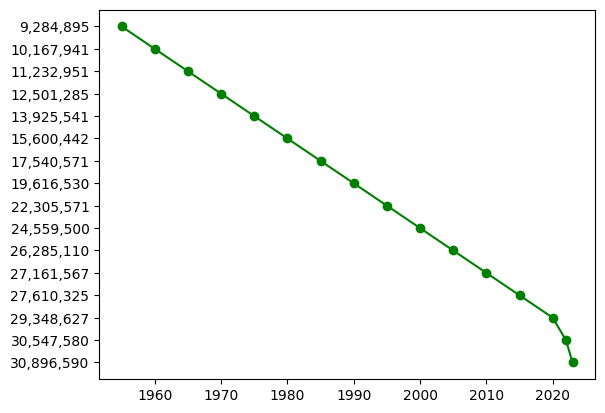

In [ ]:
plt.plot(df['Year'], df['Population'],'o-',color='green') # rough graph

In [ ]:
def str_to_int(x):
    x=x.replace(',','')
    return int(x)
df ['Population']= df['Population'].apply(str_to_int)

In [ ]:
df['Population']

0     30896590
1     30547580
2     29348627
3     27610325
4     27161567
5     26285110
6     24559500
7     22305571
8     19616530
9     17540571
10    15600442
11    13925541
12    12501285
13    11232951
14    10167941
15     9284895
Name: Population, dtype: int64

In [ ]:
df ['Population']= df['Population']/1000000

In [ ]:
df['Population']

0     30.896590
1     30.547580
2     29.348627
3     27.610325
4     27.161567
5     26.285110
6     24.559500
7     22.305571
8     19.616530
9     17.540571
10    15.600442
11    13.925541
12    12.501285
13    11.232951
14    10.167941
15     9.284895
Name: Population, dtype: float64

In [ ]:
def round_off(x):
    x=round(x)
    return int(x)
df ['Population']= df['Population'].apply(round_off)

In [ ]:
df['Population']

0     31
1     31
2     29
3     28
4     27
5     26
6     25
7     22
8     20
9     18
10    16
11    14
12    13
13    11
14    10
15     9
Name: Population, dtype: int64

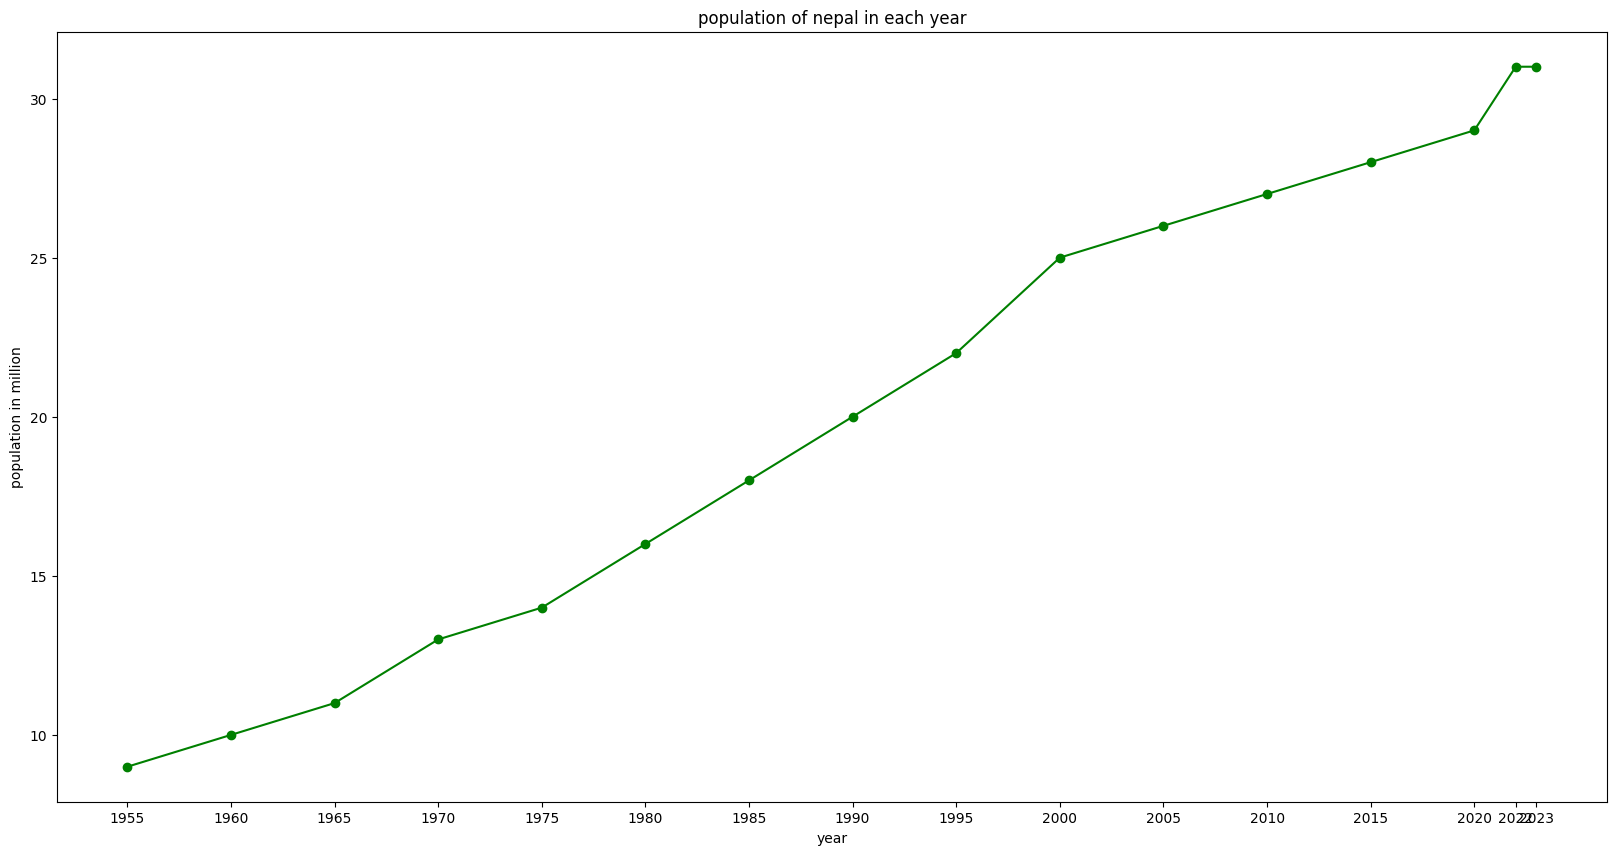

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(df['Year'], df['Population'],'o-',color='green')
plt.xlabel('year')
plt.ylabel('population in million')
plt.title('population of nepal in each year')
plt.xticks(df['Year'])
plt.show()

In [ ]:
df['Fertility Rate']

0     1.99
1     2.01
2     2.06
3     2.25
4     2.51
5     3.14
6     3.94
7     4.79
8     5.21
9     5.47
10    5.64
11    5.75
12    5.88
13    6.03
14    6.03
15    6.03
Name: Fertility Rate, dtype: float64